In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [7]:
raw_data=pd.read_csv(r'D:\ds\Car_Price_prediction2\1.04.+Real-life+example.csv')

In [8]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [10]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [11]:
data=raw_data.drop(['Model'],axis=1)

In [12]:
data=data.drop(['Registration'],axis=1)

In [13]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,936,NaN,1649,NaN,NaN,2019,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,2012.000000


In [563]:
data.isnull().sum()

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
dtype: int64

In [564]:
data_no_mv=data.dropna(axis=0)

In [565]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025.00
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,880,NaN,1534,NaN,NaN,1861,NaN
mean,NaN,19552.31,NaN,163.57,2.76,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,2012.00


C:\Users\nikhi\anaconda3.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

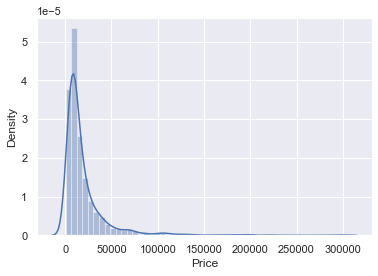

In [566]:
sns.distplot(data_no_mv['Price'])

In [567]:
q=data_no_mv['Price'].quantile(0.95)
q

64819.99999999989

In [568]:
data_1=data_no_mv[data_no_mv['Price']<q]
data_1.describe()

,Price,Mileage,EngineV,Year
count,3823.00,3823.00,3823.00,3823.00
mean,14911.80,171.10,2.72,2005.93
std,12198.37,99.27,5.05,6.57
min,600.00,0.00,0.60,1969.00
25%,6800.00,100.00,1.80,2002.00
50%,10900.00,163.00,2.00,2007.00
75%,19150.00,234.00,3.00,2011.00
max,64500.00,810.00,99.99,2016.00


C:\Users\nikhi\anaconda3.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

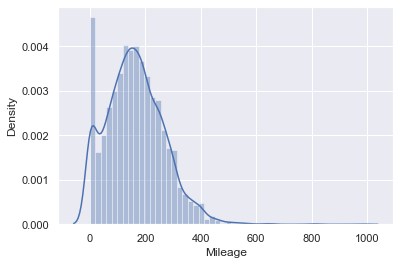

In [569]:
sns.distplot(data_no_mv['Mileage'])

In [570]:
q=data_1['Mileage'].quantile(0.95)
data_2=data_1[data_1['Mileage']<q]


C:\Users\nikhi\anaconda3.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

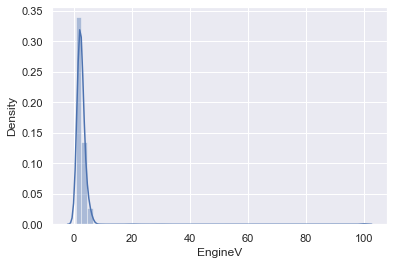

In [571]:
sns.distplot(data_no_mv['EngineV'])

C:\Users\nikhi\anaconda3.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

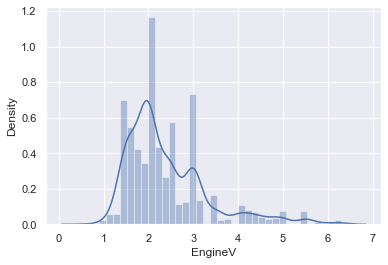

In [572]:
data_3=data_2[data_2['EngineV']<6.5] #generally engine volumes are between 0.3 and 6.5
sns.distplot(data_3['EngineV'])

In [573]:
q=data_3['Year'].quantile(0.05)
data_4=data_3[data_3['Year']>q]


C:\Users\nikhi\anaconda3.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

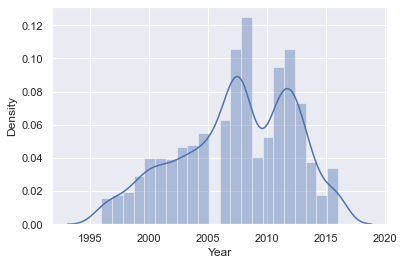

In [574]:
sns.distplot(data_4['Year'])

In [575]:
data_cleaned=data_4.reset_index(drop=True)

In [576]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3411.00,3411.00,3411.00,3411.00
mean,16102.24,155.33,2.42,2007.40
std,12294.56,81.70,0.94,4.87
min,800.00,0.00,0.60,1996.00
25%,7800.00,97.00,1.80,2004.00
50%,11960.00,155.00,2.00,2008.00
75%,20900.00,215.00,3.00,2011.00
max,64500.00,345.00,6.30,2016.00


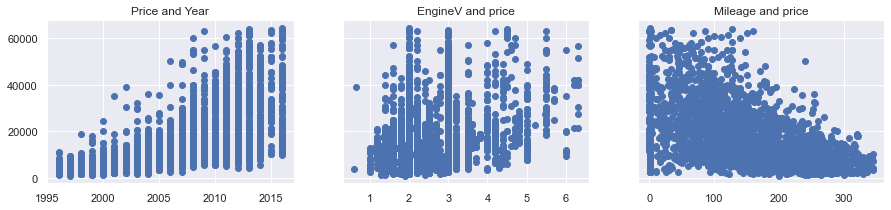

In [577]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('EngineV and price')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Mileage and price')

plt.show()


C:\Users\nikhi\anaconda3.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

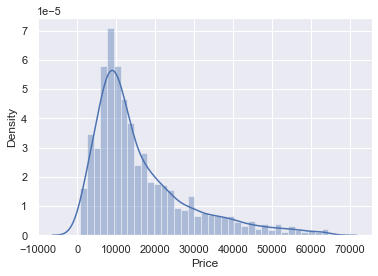

In [578]:
sns.distplot(data_cleaned['Price'])

In [579]:
log_price=np.log(data_cleaned["Price"])
data_cleaned['log_price']=log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,log_price
0,Audi,23000.00,crossover,240,4.20,Petrol,2007,10.04
1,Toyota,18300.00,crossover,120,2.00,Petrol,2011,9.81
2,Audi,14200.00,vagon,200,2.70,Diesel,2006,9.56
3,Renault,10799.00,vagon,193,1.50,Diesel,2012,9.29
4,Volkswagen,1400.00,other,212,1.80,Gas,1999,7.24
...,...,...,...,...,...,...,...,...
3406,Renault,6800.00,sedan,152,1.60,Petrol,2007,8.82
3407,Volkswagen,11500.00,van,163,2.50,Diesel,2008,9.35
3408,Toyota,17900.00,sedan,35,1.60,Petrol,2014,9.79
3409,BMW,6500.00,sedan,1,3.50,Petrol,1999,8.78


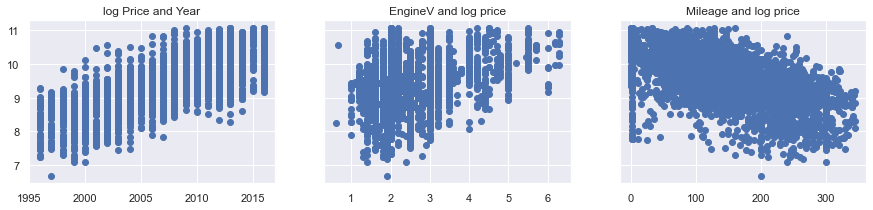

In [580]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('EngineV and log price')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Mileage and log price')

plt.show()


In [581]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

In [582]:
#MULTICLOLINEARITY

In [583]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Year',
       'log_price'], dtype=object)

In [584]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns

In [585]:
vif #generally vif will be less than 5 
#here Year is too corelated so we are removing year

,VIF,features
0,4.63,Mileage
1,10.38,Year
2,7.68,EngineV


In [586]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)

In [587]:
#Create dummy variables

data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [588]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,200,2.70,9.56,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,193,1.50,9.29,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,212,1.80,7.24,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [589]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol'], dtype=object)

In [590]:
cols=['log_price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol']

In [591]:
data_preprocessed=data_with_dummies[cols]

In [592]:
data_preprocessed.head()

,log_price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,10.04,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,9.81,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,9.56,200,2.70,9.56,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,9.29,193,1.50,9.29,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,7.24,212,1.80,7.24,0,0,0,0,0,1,0,1,0,0,0,1,0,0


# Linear_Regression

In [593]:
target=data_preprocessed['log_price']
inputs=data_preprocessed.drop(['log_price'],axis=1)

In [594]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [595]:
inputs_scaled=scaler.transform(inputs)

# Train Test split

In [596]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,target,test_size=0.2,random_state=365)

In [597]:
x_train
x_train[0]
X_train=x_train[0]

In [598]:
Y_test=y_test.T.drop_duplicates().T

In [599]:
Y_test

,log_price
1260,9.20
2363,9.00
1616,8.48
1658,9.02
1090,9.17
2019,9.47
2844,8.78
1683,9.35
2359,9.01
2042,10.09


In [600]:
Y_train=y_train.T.drop_duplicates().T
Y_train

,log_price
910,9.69
1847,8.59
1207,9.51
2695,8.81
2064,8.39
...,...
2309,9.14
428,9.51
859,9.54
801,8.96


In [601]:
X_test=x_test[0]

In [602]:
reg=LinearRegression()

In [603]:
reg.fit(x_train,y_train)

LinearRegression()

In [604]:
y_hat=reg.predict(x_train)

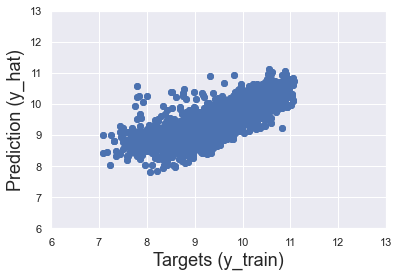

In [605]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Prediction (y_hat)' ,size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\nikhi\anaconda3.1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

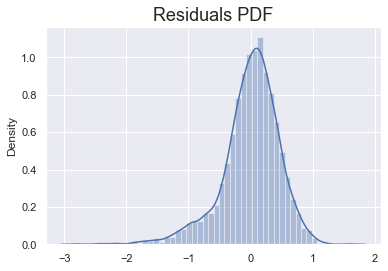

In [606]:
sns.distplot((y_train - y_hat))
plt.title("Residuals PDF",size=18)

In [607]:
reg.score(x_train,y_train)

0.6035367422062412

In [608]:
reg.intercept_[0]

9.424847084432594

In [609]:
reg.coef_[0]

array([-0.44567987,  0.19356224,  0.01879674,  0.03073546, -0.1175082 ,
       -0.13156026, -0.02769683, -0.03373479, -0.14549468, -0.08472072,
       -0.18216141, -0.15965906, -0.1354526 , -0.05058962, -0.03717616,
       -0.0838904 ])

In [610]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])


In [611]:
reg_summary

,Features
0,Mileage
1,EngineV
2,Brand_BMW
3,Brand_Mercedes-Benz
4,Brand_Mitsubishi
5,Brand_Renault
6,Brand_Toyota
7,Brand_Volkswagen
8,Body_hatch
9,Body_other


In [612]:
reg_summary['Weights']=reg.coef_[0]
reg_summary

,Features,Weights
0,Mileage,-0.45
1,EngineV,0.19
2,Brand_BMW,0.02
3,Brand_Mercedes-Benz,0.03
4,Brand_Mitsubishi,-0.12
5,Brand_Renault,-0.13
6,Brand_Toyota,-0.03
7,Brand_Volkswagen,-0.03
8,Body_hatch,-0.15
9,Body_other,-0.08


In [613]:
data_cleaned['Brand'].unique()

array(['Audi', 'Toyota', 'Renault', 'Volkswagen', 'BMW', 'Mitsubishi',
       'Mercedes-Benz'], dtype=object)

# Testing

In [614]:
y_hat_test=reg.predict(x_test)

In [615]:
y_hat_test

array([[8.69786013, 8.69786013],
       [8.89176056, 8.89176056],
       [9.06669227, 9.06669227],
       ...,
       [9.61533925, 9.61533925],
       [9.97435564, 9.97435564],
       [9.17887221, 9.17887221]])

In [616]:
y_h_test

array([ 9.02292133,  9.21343076,  8.95267181,  8.86878165,  9.09900907,
        9.81599909,  9.64129566,  9.8783313 ,  9.41231974, 10.39035587,
        8.63220612,  8.49537082,  8.39297203,  9.33439673,  8.91444138,
        9.16265997,  9.99268457,  9.04045164, 10.56913574,  9.31619286,
        9.3447195 , 10.30759589,  8.8416848 ,  9.46606592, 10.10617797,
       10.78492188,  8.36678224,  8.90509555, 10.4994527 , 10.04689881,
        9.51067101,  9.45315994,  9.30420191, 10.05419666,  9.95383081,
        9.31151204,  9.237674  , 10.25044182,  9.13023335,  9.77088077,
        9.71782746,  9.75503327,  9.91755428,  9.90075488,  8.63220612,
        9.0196836 ,  9.10590867, 10.11663974, 11.11362409,  8.28284736,
        8.67639384,  7.62788755,  9.39803632,  9.89822536,  9.72351294,
        9.41850915,  9.649304  ,  9.76010444, 10.42590979,  9.04206988,
        9.3222899 ,  8.88685068,  9.25251834,  8.30542637,  8.89532504,
        9.78788908,  7.91243179,  8.83527894,  8.81793793,  8.68

In [617]:
y_h_test

array([ 9.02292133,  9.21343076,  8.95267181,  8.86878165,  9.09900907,
        9.81599909,  9.64129566,  9.8783313 ,  9.41231974, 10.39035587,
        8.63220612,  8.49537082,  8.39297203,  9.33439673,  8.91444138,
        9.16265997,  9.99268457,  9.04045164, 10.56913574,  9.31619286,
        9.3447195 , 10.30759589,  8.8416848 ,  9.46606592, 10.10617797,
       10.78492188,  8.36678224,  8.90509555, 10.4994527 , 10.04689881,
        9.51067101,  9.45315994,  9.30420191, 10.05419666,  9.95383081,
        9.31151204,  9.237674  , 10.25044182,  9.13023335,  9.77088077,
        9.71782746,  9.75503327,  9.91755428,  9.90075488,  8.63220612,
        9.0196836 ,  9.10590867, 10.11663974, 11.11362409,  8.28284736,
        8.67639384,  7.62788755,  9.39803632,  9.89822536,  9.72351294,
        9.41850915,  9.649304  ,  9.76010444, 10.42590979,  9.04206988,
        9.3222899 ,  8.88685068,  9.25251834,  8.30542637,  8.89532504,
        9.78788908,  7.91243179,  8.83527894,  8.81793793,  8.68

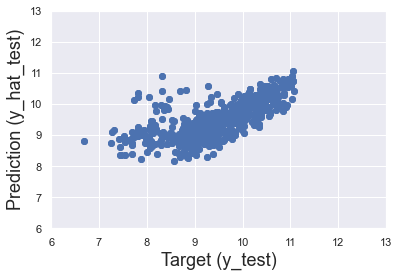

In [618]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Target (y_test)',size=18)
plt.ylabel('Prediction (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [619]:
Y_hat_test=y_hat_test[:,0]

In [620]:
df_pf=pd.DataFrame(np.exp(y_hat_test[:,0]),columns=['Prediction'])
df_pf

,Prediction
0,5990.08
1,7271.81
2,8661.93
3,8718.54
4,9732.69
5,12832.87
6,6737.05
7,11749.94
8,11517.97
9,19179.30


In [621]:
df_pf['Target']=np.exp(Y_test)
df_pf.head()
df_pf.dropna(axis=0)

,Prediction,Target
5,12832.87,11950.00
8,11517.97,16000.00
16,12415.80,10500.00
19,10773.76,6500.00
22,5706.38,21500.00
26,6090.52,14500.00
37,15051.76,8250.00
40,13570.00,9200.00
48,7163.77,6500.00
51,22049.20,8700.00


In [622]:
Y_test=Y_test.reset_index(drop=True)
df_pf.head()

,Prediction,Target
0,5990.08,NaN
1,7271.81,NaN
2,8661.93,NaN
3,8718.54,NaN
4,9732.69,NaN


In [623]:
df_pf['Residual']=df_pf['Target']-df_pf['Prediction']

In [624]:
df_pf['Difference%']=np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [625]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,683.00,130.00,130.00,130.00
mean,15044.76,16246.70,1392.54,105.94
std,9530.45,12453.42,15407.13,147.60
min,3471.38,1400.00,-39484.59,0.87
25%,8200.16,8440.00,-6213.44,29.10
50%,12099.20,11975.00,556.29,60.20
75%,19144.31,21650.00,8861.50,82.34
max,62585.42,63000.00,46180.17,838.27


In [626]:
pd.options.display.max_rows=999
pd.set_option('display.float_format',lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
62,13827.35,13708.50,-118.85,0.87
142,7904.63,8100.00,195.37,2.41
506,10207.01,10500.00,292.99,2.79
162,24399.74,25250.00,850.26,3.37
466,10292.61,10800.00,507.39,4.70
235,10027.86,10550.00,522.14,4.95
159,10059.56,10650.00,590.44,5.54
271,12246.53,13100.00,853.47,6.52
5,12832.87,11950.00,-882.87,7.39
352,20667.05,22400.00,1732.95,7.74
